In [100]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [129]:
##Sets Pandas to not truncate dataframes
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
##Sets Pandas to truncate dataframes
pd.set_option("display.max_rows", 10)

In [101]:
#ML Dependencies
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=4, n_features=1, random_state=0, noise=4, bias=100.0)

In [102]:
#Input Paths
sizedata = 'dataformodel/sizecategorydataformodel.csv'

In [103]:
#Read in CSV
size_df = pd.read_csv(sizedata)

In [104]:
size_df


,category,tickets
0,1,131046
1,2,200755
2,3,20073
3,4,4036


In [105]:
X = size_df["category"].values.reshape(-1, 1)
y = size_df["tickets"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (4, 1) (4, 1)


Text(0, 0.5, 'Number of Tickets')

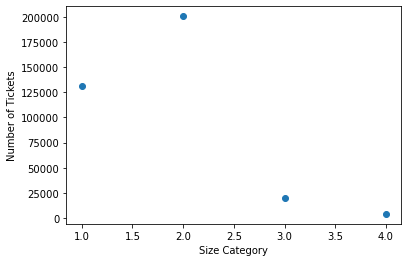

In [106]:
# Plot the data to see if a linear trend exists
plt.scatter(X, y)
plt.xlabel("Size Category")
plt.ylabel("Number of Tickets")


In [107]:
#linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [108]:
#Assign Model to Variable
model = LinearRegression()
model

LinearRegression()

In [109]:
model.fit(X, y)

LinearRegression()

In [110]:
print(model)

LinearRegression()


In [111]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-56171.2]]
y-axis intercept:  [229405.5]


In [112]:
#Model is y=(-56171.2)X + 229405.5

In [113]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [131046]
Predicted output: [173234.3]
Prediction Error: [42188.3]


In [130]:
error_df = pd.DataFrame({'Predicted':[predictions],'Actual':[y], 'Error': [predictions-y]})
error_df

,Predicted,Actual,Error
0,"[[173234.3], [117063.09999999999], [60891.8999...","[[131046], [200755], [20073], [4036]]","[[42188.29999999999], [-83691.90000000001], [4..."


In [132]:
print(predictions)

[[173234.3]
 [117063.1]
 [ 60891.9]
 [  4720.7]]


In [133]:
print(y)

[[131046]
 [200755]
 [ 20073]
 [  4036]]


In [136]:
print(predictions-y)

[[ 42188.3]
 [-83691.9]
 [ 40818.9]
 [   684.7]]


In [118]:
x_min = X.min()
x_max = X.max()

In [119]:
y_min_actual = y.min()
y_max_actual = y.max()

In [123]:
y_min = 229405.5 - 56171.2  * x_min
y_max = 229405.5 - 56171.2  * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 4036
Calculated Min Value: 173234.3
Actual Max Value: 200755
Calculated Max Value: 4720.700000000012


In [124]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 4036
Predicted Min Value: [[173234.3]]
Actual Max Value: 200755
Predicted Max Value: [[4720.7]]


Text(0, 0.5, 'Number of Tickets')

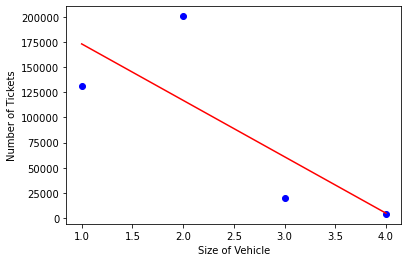

In [135]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')
plt.xlabel("Size of Vehicle")
plt.ylabel("Number of Tickets")